# Overview

## Description

This notebook contains exercises dedicated to compute different data processing techniques for statistical data analysis and model building. Each exercise answers to a different question according to the type of analysis needed. In order for the reader to understand the data the project works with |  the structure of the **automobile** dataset is the following:

In [72]:
# Importing pandas to display the dataset's head
import pandas as pd

In [73]:
# Import the dataset from the csv file and display head
df = pd.read_csv("..\\data\\automobile.csv", na_values='?')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Questions to be answered

The project aims to analyse data deep enough as to identify the following key points:

1) **Variable classification:**
    + *Data types*
    + *Measuring scales*
2) **Data quality issues:**
    + *Duplicates*
    + *Outliers*
    + *Missing values*
    + *Other potential problems*
3) **Applicable processing methods:**
    + *Potential consequences*
    + *Arguments in favour of the chosen method*

# Understanding the data

### Structure and meaning

In order to further establish any type of analysis, the data must be clearly understood by acquiring the necessary knowledge regarding (*particularly*) its structure and the meaning of its columns. To comprehend the dataset's structure, we can take a look at the previously shown table representation of the dataset:

In [74]:
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


As it has become evident, ***26*** attributes are to be studied for ***each row*** in the table and most of their names are objectively self-explanatory. It is evident that the last column (***price***) represents the output of our data, which means it's values somehow depend on the rest of the attributes' values.

Even if the columns' names are explanatory by themselves, the most general ones must become clear for almost any reader as to what they mean, for which they should be described anyway:

1) `symboling` corresponds to the degree to which the automobile is riskier than what its price indicates within an insurance context (*-3 being the lowest relative risk and 3 being the highest*).
2) `normalized-losses` is a normalized attribute that refers to the average insurer's yearly loss payment.
3) The rest of the attributes refer to very specific attributes of a car that have an impact on its final price.

### Data types

In order to better understand the nature of the data the project is dealing with, it is of special importance to know what ***data type*** is being worked with for each column, which can be done with the help of the following line of code:

In [75]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
number-of-doors       object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

An ***apply*** function will be called for each of the previously mentioned columns in order to turn ***?*** characters into ***NaN*** and the other values into their corresponding data type as follows:

In [76]:
# Helper dictionary for converting numerical words into actual numbers
help_dict = {
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9,
    'twelve': 12
}

In [77]:
# Fix number of doors
df['number-of-doors'] = df['number-of-doors'].replace(help_dict)
# Fix number of cylinders
df['num-of-cylinders'] = df['num-of-cylinders'].replace(help_dict)

Now that the ***data types*** are known, it is possible to treat them separately for some situations where it could prove useful:

In [78]:
# Import yet another essential package
import numpy as np

In [79]:
# Dataset containg numeric columns only
df_num = df.select_dtypes(include=np.number)
df_num.head()

,symboling,normalized-losses,number-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,2.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,4.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,4.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [80]:
# Dataset containing categorical columns only
df_cat = df.select_dtypes(include=["object"])
df_cat.head()

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system
0,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi,gas,std,sedan,fwd,front,ohc,mpfi
4,audi,gas,std,sedan,4wd,front,ohc,mpfi


Some columns seem to be placed in the wrong category due to the way the missing data was stored in them, which must be handled properly before going any further. The columns to be adjusted are the following:

- `normalized-losses`
- `number-of-doors` 
- `num-of-cylinders`
- `bore`
- `stroke`
- `horsepower`
- `peak-rpm`
- `price`  

Now, if data type separation is performed again, each column should fall into its' corresponding dataframe correctly:

In [81]:
df_num = df.select_dtypes(include=np.number)
df_cat = df.select_dtypes(include=["object"])

symb_col = df_num.pop('symboling')

df_cat.insert(0, 'symboling', symb_col)

In [82]:
df_num.head()

,normalized-losses,number-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,NaN,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,NaN,2.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,4.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,4.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [83]:
df_cat.head()

,symboling,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system
0,3,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
1,3,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
2,1,alfa-romero,gas,std,hatchback,rwd,front,ohcv,mpfi
3,2,audi,gas,std,sedan,fwd,front,ohc,mpfi
4,2,audi,gas,std,sedan,4wd,front,ohc,mpfi


### Measuring scales

Four scale variable measurement categories are to be considered:

- **Nominal:** *Assigning numbers as labels to identify objects or classes of objects. This type of category fits in the data types that the following columns contain:**
    + `make`
    + `fuel-type`
    + `aspiration`
    + `body-style`
    + `drive-wheels`
    + `engine-location`
    + `engine-type`
    + `fuel-system`
- **Ordinal:** *Assigning numbers as labels to reflect a rank ordering. The following columns could fit the description:*
    + `symboling`
- **Interval:** *The difference between the assigned numbers can be meaningflly interpreted, such as time, where there's no absolute zero in the attribute's nature.*
- **Ratio:** *Similar to the Interval category, but the scale includes an absolute 'zero' point, such as height and traffic density, which describes the following columns:*
    + `number-of-doors`
    + `num-of-cylinders`
    + `normalized-losses`
    + `wheel-base`
    + `length`
    + `width`
    + `height`
    + `curb-weight`
    + `num-of-cylinders`
    + `engine-size`
    + `bore`
    + `stroke`
    + `compression-ratio`
    + `horsepower`
    + `peak-rpm`
    + `city-mpg`
    + `highway-mpg`
    + `price`

# Data quality issues

## Duplicates

In order to determine if the dataset contains duplicate in each entry, the following line of code can be used:

In [84]:
duplicate_bool = df.duplicated()
duplicate_bool

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

Since the result's size is too large for it to be easily interpreted, we can simply count the number of unique values and duplicates within the dataset using the following code:

In [85]:
duplicate_bool.value_counts()

False    205
dtype: int64

Therefore, it is evident that there are no duplicates in the dataset.

## Missing data

Since it is known that there are no duplicates within the dataset, it is convenient to acknowledge the missing data each column could contain, which can be done using the following lines of code:

In [86]:
missing_count = df.isna().sum().to_frame()
missing_count.columns = ["Missing"]
missing_count["Data %"] = missing_count["Missing"] * 100 / len(df["price"])
missing_count

,Missing,Data %
symboling,0,0.00000
normalized-losses,41,20.00000
make,0,0.00000
fuel-type,0,0.00000
aspiration,0,0.00000
number-of-doors,2,0.97561
body-style,0,0.00000
drive-wheels,0,0.00000
engine-location,0,0.00000
wheel-base,0,0.00000


None of the previous columns seem to possess a dangerous percentage of missing data, except for the `normalized-losses` column, which will be the one to be treated first in order to conclude whether its data should be imputed using mean or median, or the column should just be deleted in a straightforward fashion.

Firstly, it is of special importance to delete the rows where the price value is missing and run the missing values analysis again:

In [90]:
df.dropna(subset=['price'], inplace=True)

In [91]:
missing_count = df.isna().sum().to_frame()
missing_count.columns = ["Missing"]
missing_count["Data %"] = missing_count["Missing"] * 100 / len(df["price"])
missing_count

,Missing,Data %
symboling,0,0.000000
normalized-losses,37,18.407960
make,0,0.000000
fuel-type,0,0.000000
aspiration,0,0.000000
number-of-doors,2,0.995025
body-style,0,0.000000
drive-wheels,0,0.000000
engine-location,0,0.000000
wheel-base,0,0.000000


In order to see how much of an impact the normalized losses have over the price, we can execute the following code:

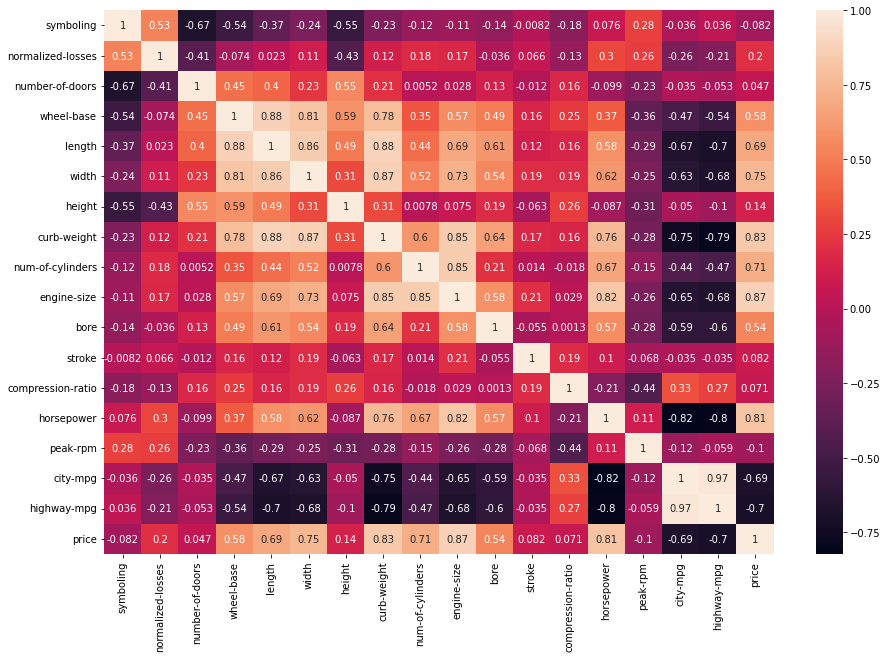

In [92]:
import matplotlib.pyplot as plt
import seaborn as sb

fig = plt.figure(figsize=(15, 10))
sb.heatmap(df.corr(), annot=True)
plt.show()

The following is the distribution of the normalized losses:

<AxesSubplot:>

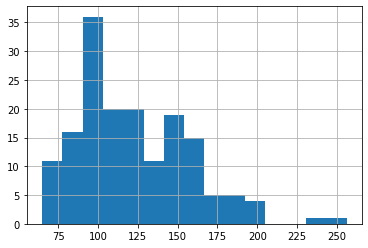

In [93]:
df["normalized-losses"].hist(bins=15)

The mean and median of the column are:

In [94]:
print(f"Mean: {df['normalized-losses'].mean()} | Median: {df['normalized-losses'].median()}")

Mean: 122.0 | Median: 115.0


If it was decided to apply data imputation by using the mean as follows:

In [95]:
mean_losses = df[['normalized-losses']]
mean_losses = mean_losses.fillna(mean_losses['normalized-losses'].mean())

Then, in comparison, the distributions (*before and after the imputation*) would look like this:

In [96]:
# Importing matplotlib to visualize some data
from matplotlib import pyplot as plt
import seaborn as sb

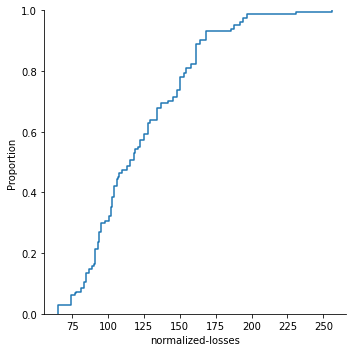

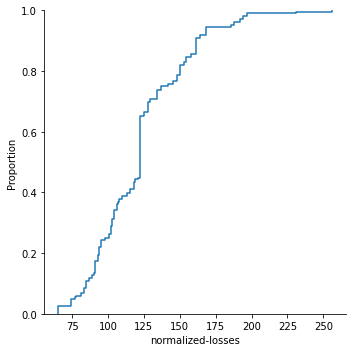

In [97]:
# Creating subplot
sb.displot(df, x='normalized-losses', kind='ecdf')
sb.displot(mean_losses, x='normalized-losses', kind='ecdf')

Since the relevance of the column in relation to the overall price is relatively small and the behaviour of the data is pretty different after applying imputation, the column should be removed from the database.

In [98]:
df.drop('normalized-losses', axis=1, inplace=True)
df.head()

,symboling,make,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Now, we follow a very similar process in the case of the rest of the data by performing a z-test for each column after imputation against its original data:

In [99]:
from statsmodels.stats.weightstats import ztest as ztest

# Update numerical columns and exclude symboling since it's categorical
df_num = df.select_dtypes(exclude='object').drop('symboling', axis=1, inplace=False)

for colname in df_num.columns:
    if df[colname].isna().sum() > 0:
        orig_data = df_num[colname]
        impt_data = df_num[colname].fillna(orig_data.mean(), inplace=False)

        result = ztest(orig_data, impt_data, value=orig_data.mean() - impt_data.mean())
        p_value = result[1]

        print(f"{colname} is significantly changed: {p_value < 0.05}")

number-of-doors is significantly changed: False
bore is significantly changed: False
stroke is significantly changed: False
horsepower is significantly changed: False
peak-rpm is significantly changed: False


If we perform the same test but using the median, we get:

In [100]:
for colname in df_num.columns:
    if df[colname].isna().sum() > 0:
        orig_data = df_num[colname]
        impt_data = df_num[colname].fillna(orig_data.median(), inplace=False)

        result = ztest(orig_data, impt_data, value=orig_data.mean() - impt_data.mean())
        p_value = result[1]

        print(f"{colname} is significantly changed: {p_value < 0.05}")

number-of-doors is significantly changed: False
bore is significantly changed: False
stroke is significantly changed: False
horsepower is significantly changed: False
peak-rpm is significantly changed: False


Due to the fact that both values present the same results, the mean will be used to perform imputations for the columns where the output was **False**, since the **p-value** was less than ***0.5***, therefore, providing sufficient evidence to reject the null **hypothesis**:

In [101]:
for colname in df_num.columns:
    if df[colname].isna().sum() > 0:
        df[colname].fillna(df[colname].mean(), inplace=True)
        print(f"Imputation performed on {colname} using the mean value of {df[colname].mean()}")

Imputation performed on number-of-doors using the mean value of 3.135678391959799
Imputation performed on bore using the mean value of 3.330710659898477
Imputation performed on stroke using the mean value of 3.2569035532994914
Imputation performed on horsepower using the mean value of 103.39698492462313
Imputation performed on peak-rpm using the mean value of 5117.587939698492


Now, in order to check that all numerical columns have no missing values:

In [102]:
# Update numerical columns and exclude symboling since it's categorical
df_num = df.select_dtypes(exclude='object').drop('symboling', axis=1, inplace=False)

missing_count = df.isna().sum().to_frame()
missing_count.columns = ["Missing"]
missing_count["Data %"] = missing_count["Missing"] * 100 / len(df["price"])
missing_count

,Missing,Data %
symboling,0,0.0
make,0,0.0
fuel-type,0,0.0
aspiration,0,0.0
number-of-doors,0,0.0
body-style,0,0.0
drive-wheels,0,0.0
engine-location,0,0.0
wheel-base,0,0.0
length,0,0.0


## Outliers

Generating summary statistics is a quick way to help us determine whether or not the dataset has outliers:

In [103]:
df.drop(['symboling', 'price'], axis=1, inplace=False).describe()

,number-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,3.135678,98.797015,174.200995,65.889055,53.766667,2555.666667,4.363184,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567
std,0.988273,6.066366,12.322175,2.101471,2.447822,517.296727,1.059452,41.546834,0.268072,0.316048,4.004965,37.365602,478.113178,6.423220,6.815150
min,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,2.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,4.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000
75%,4.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,4.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000


As the table shows, no immediate outliers seem to exist within the data. In order to further prove this point, data visualization is a good next step:

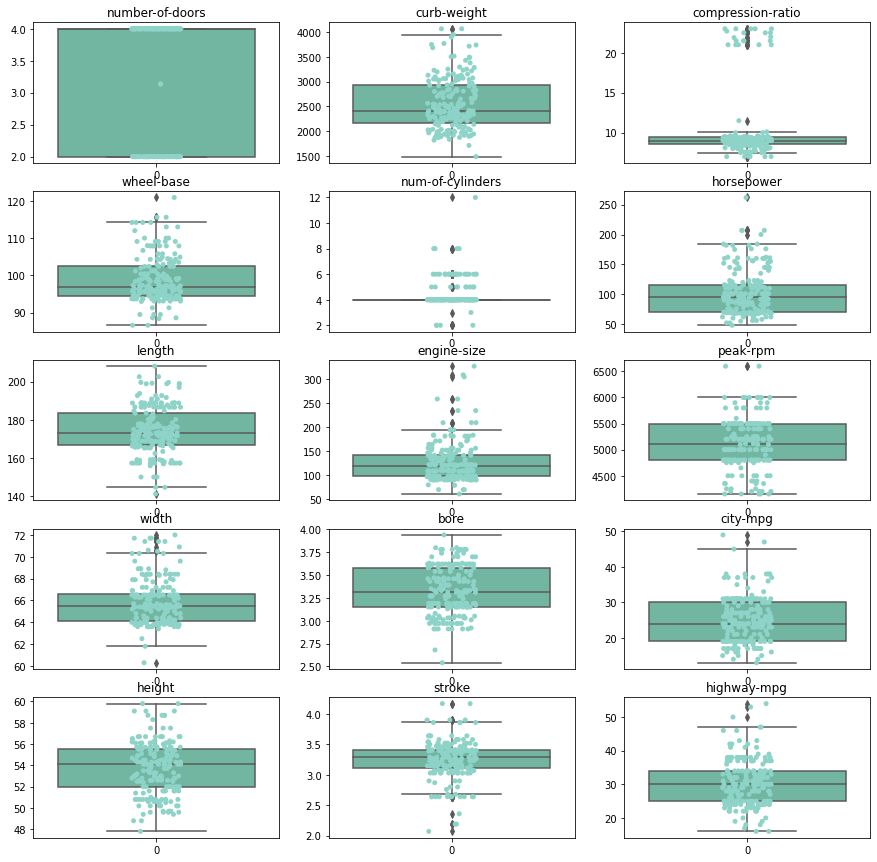

In [104]:
fig, axes = plt.subplots(5, 3, figsize=(15, 15))

i, j = 0, 0

for colname in df_num.drop('price', axis=1, inplace=False).columns:
        sb.boxplot(data=df[colname], ax=axes[i, j], palette="Set2").set_title(colname)
        sb.stripplot(data=df[colname], ax=axes[i, j], palette="Set3")
        i += 1
        if i >= 5:
            i = 0
            j += 1

plt.show()

Before deciding on a specific statistical method for finding outliers, it is important to consider the distribution types of the columns, since the results could differ greatly depending on the implemented technique. In order to do so, we need to check that the distributions are normal:

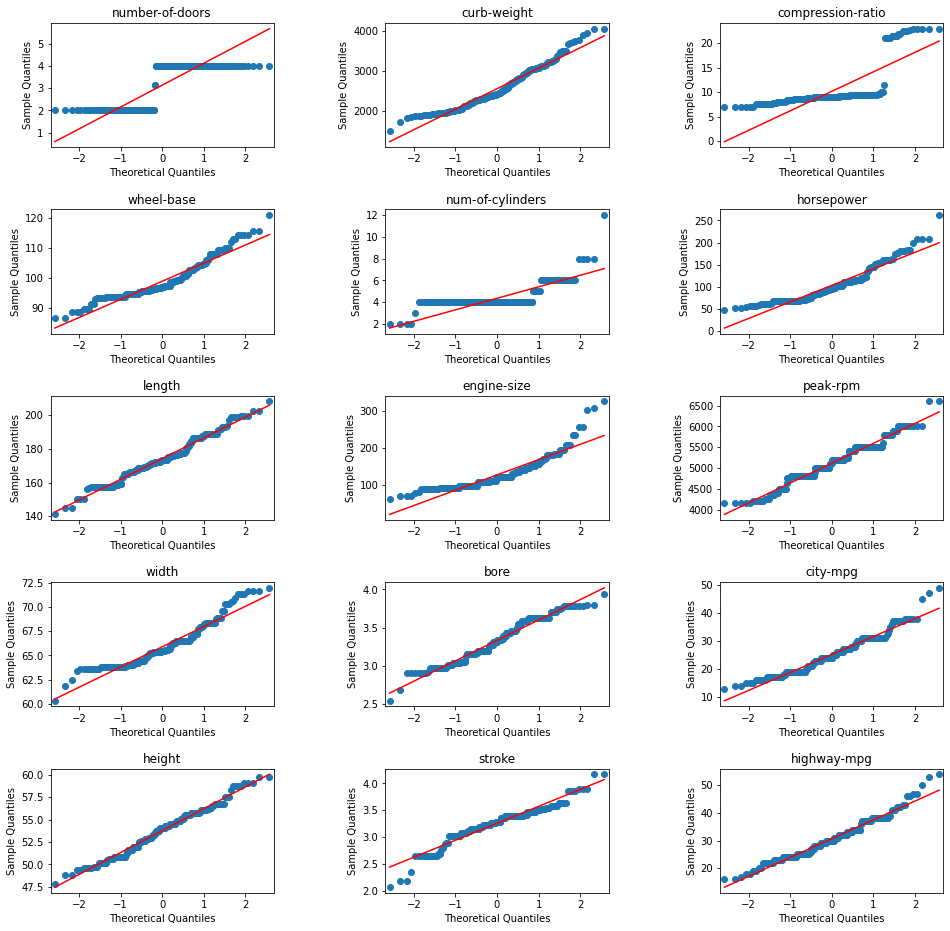

In [105]:
from statsmodels.graphics.gofplots import qqplot

fig, axes = plt.subplots(5, 3, figsize=(16, 16))

i, j = 0, 0

for colname in df_num.drop('price', axis=1, inplace=False).columns:
        axes[i, j].set_title(colname)
        qqplot(df_num[colname], ax=axes[i, j], line='s')
        i += 1
        if i >= 5:
            i = 0
            j += 1

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

If we want to confirm the normality of each column, we could use D'Agostino's $k^2$ test, since it takes into account the **skew** and the **kurtosis** of a distribution:

In [106]:
from scipy.stats import normaltest

not_normal_columns = []
normal_columns = []

for colname in df_num.drop('price', axis=1, inplace=False).columns:
    stat, p = normaltest(df[colname])
    alpha = 0.05
    if p <= alpha:
        not_normal_columns.append(colname)
    else:
        normal_columns.append(colname)
    print(f"{colname} is Gaussian: \t{p > alpha}")

number-of-doors is Gaussian: 	False
wheel-base is Gaussian: 	False
length is Gaussian: 	True
width is Gaussian: 	False
height is Gaussian: 	True
curb-weight is Gaussian: 	False
num-of-cylinders is Gaussian: 	False
engine-size is Gaussian: 	False
bore is Gaussian: 	False
stroke is Gaussian: 	False
compression-ratio is Gaussian: 	False
horsepower is Gaussian: 	False
peak-rpm is Gaussian: 	True
city-mpg is Gaussian: 	False
highway-mpg is Gaussian: 	False


Since most of the data columns do not follow a normal distribution behaviour, it would be convenient to implement the **interquartile range method** for the ones that do not and **z-score** for the ones that do.

### Not normal distributions

For the distributions that do not present a normal behaviour,the **IQR** method will be used with the following function:

In [107]:
def find_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    iqr = q3 - q1

    return data[((data < (q1 - 1.5 * iqr)) | (data > (q3+ 1.5 * iqr)))]

The above function will be implemented as follows:

In [108]:
for colname in not_normal_columns:
    outliers = find_outliers_iqr(df[colname])
    if len(outliers) > 0:
        print(f"---\t{colname}\t---")
        print(f"# of outliers: {outliers.count()} || Max outlying value: {outliers.max()} || Min outlying value: {outliers.min()}")

---	wheel-base	---
# of outliers: 3 || Max outlying value: 120.9 || Min outlying value: 115.6
---	width	---
# of outliers: 11 || Max outlying value: 72.0 || Min outlying value: 60.3
---	curb-weight	---
# of outliers: 2 || Max outlying value: 4066 || Min outlying value: 4066
---	num-of-cylinders	---
# of outliers: 44 || Max outlying value: 12 || Min outlying value: 2
---	engine-size	---
# of outliers: 10 || Max outlying value: 326 || Min outlying value: 209
---	stroke	---
# of outliers: 20 || Max outlying value: 4.17 || Min outlying value: 2.07
---	compression-ratio	---
# of outliers: 27 || Max outlying value: 23.0 || Min outlying value: 7.0
---	horsepower	---
# of outliers: 5 || Max outlying value: 262.0 || Min outlying value: 200.0
---	city-mpg	---
# of outliers: 2 || Max outlying value: 49 || Min outlying value: 47
---	highway-mpg	---
# of outliers: 3 || Max outlying value: 54 || Min outlying value: 50


By identifying the outliers, we can now determine if any of them are significant enough as to consider applying some procedure to the column they belong to. The **compression-ratio** seems to weakly affect the rest of the columns, which means that a transformation for left-skewed data could be applied, in this case, it will be the **square root transformation**:

In [109]:
test_df = np.cbrt(df['compression-ratio'])

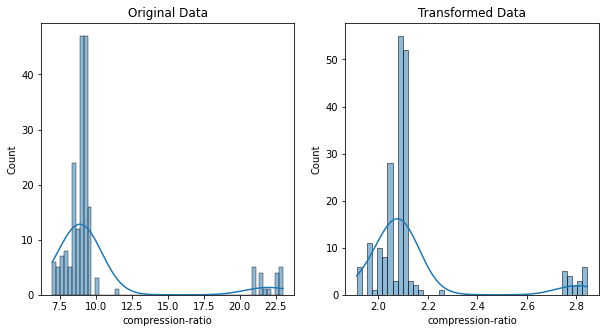

In [110]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sb.histplot(df['compression-ratio'], ax=axes[0], kde=True)
sb.histplot(test_df, ax=axes[1], kde=True)

axes[0].set_title("Original Data")
axes[1].set_title("Transformed Data")

plt.show()

In [111]:
df['compression-ratio'] = test_df

Since the rest of the columns' outliers (*except for the ones from the `num-of-cylinders` attribute*) are not signficantly different from the other values, it could prove better to cap each column's values to its respective maximum and minimum within their quantiles:

In [112]:
not_normal_columns.remove('compression-ratio')
not_normal_columns.remove('num-of-cylinders')

In [113]:
for colname in not_normal_columns:
    lower_perc = 0.05
    higher_perc = 0.95

    low, high = df[colname].quantile([lower_perc, higher_perc])

    df[colname][df[colname] < low] = low
    df[colname][df[colname] > high] = high


C:\Users\irigx\AppData\Local\Temp/ipykernel_12408/3930511979.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colname][df[colname] < low] = low
C:\Users\irigx\AppData\Local\Temp/ipykernel_12408/3930511979.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colname][df[colname] > high] = high


### Normal distributions

The **z-score** method will be implemented as follows:

In [114]:
def find_outliers_z(data, elem):
    data_mean = data.mean()
    std_dev = np.std(data)
    outliers = []

    return (elem - data_mean) / std_dev

Since the **length** and **height** columns' outliers do not have an important difference from the extremes of the rest of the data, they could be capped too in order to clean the data up:

In [115]:
for colname in ['length', 'height']:
    lower_perc = 0.05
    higher_perc = 0.95

    low, high = df[colname].quantile([lower_perc, higher_perc])

    df[colname][df[colname] < low] = low
    df[colname][df[colname] > high] = high

C:\Users\irigx\AppData\Local\Temp/ipykernel_12408/3275186267.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colname][df[colname] < low] = low
C:\Users\irigx\AppData\Local\Temp/ipykernel_12408/3275186267.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colname][df[colname] > high] = high


Finally, in order to avoid unnecessary noise in the data, and taking advantage of the fact that there are only a few outlying values for the **peak-rpm** column, we will drop the rows that contain such values:

In [116]:
from scipy.stats import zscore

df = df[(np.abs(zscore(df['peak-rpm'])) < 2)]

Our data should now be clean and well-adjusted.

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          194 non-null    int64  
 1   make               194 non-null    object 
 2   fuel-type          194 non-null    object 
 3   aspiration         194 non-null    object 
 4   number-of-doors    194 non-null    float64
 5   body-style         194 non-null    object 
 6   drive-wheels       194 non-null    object 
 7   engine-location    194 non-null    object 
 8   wheel-base         194 non-null    float64
 9   length             194 non-null    float64
 10  width              194 non-null    float64
 11  height             194 non-null    float64
 12  curb-weight        194 non-null    int64  
 13  engine-type        194 non-null    object 
 14  num-of-cylinders   194 non-null    int64  
 15  engine-size        194 non-null    int64  
 16  fuel-system        194 non

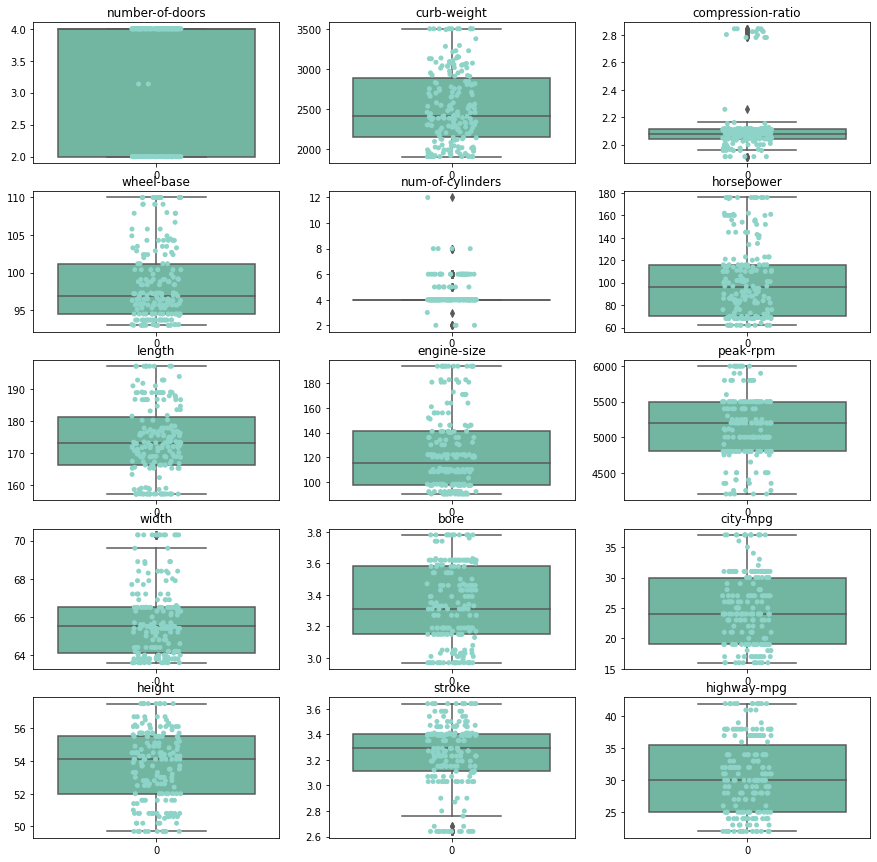

In [118]:
fig, axes = plt.subplots(5, 3, figsize=(15, 15))

i, j = 0, 0

for colname in df_num.drop('price', axis=1, inplace=False).columns:
        sb.boxplot(data=df[colname], ax=axes[i, j], palette="Set2").set_title(colname)
        sb.stripplot(data=df[colname], ax=axes[i, j], palette="Set3")
        i += 1
        if i >= 5:
            i = 0
            j += 1

plt.show()